In [5]:
import pandas as pd

data = 'combine.csv'

df = pd.read_csv(data, sep=';')
#df_2022 = df[df['Année'] == 2022]

In [2]:
pip install geopandas matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 10.1 MB/s eta 0:00:00 0:00:01
  Cloning https://github.com/inseefrlab/cartiflette (to revision 80b8a5a28371feb6df31d55bcc2617948a5f9b1a) to /tmp/pip-req-build-p7lioq8q
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-p7lioq8q
  Running command git rev-parse -q --verify 'sha^80b8a5a28371feb6df31d55bc

In [6]:
df2 = df[df['Département']=='02']

In [7]:
df2.head()

,Année,Numéro,Département,Code INSEE,Nom de la commune,Date de première alerte,Origine de l'alerte,Moyens de première intervention,Surface parcourue (m2),Surface forêt (m2),...,Décès ou bâtiments touchés,Nombre de décès,Nombre de bâtiments totalement détruits,Nombre de bâtiments partiellement détruits,Hygrométrie (%),Vitesse moyenne du vent (Km/h),Direction du vent,Température (°C),Précision de la donnée,Présence d'un contour valide
22511,2015,155,02,02329,Fourdrain,15/04/2015 15:07,Indéterminé,NaN,10000,10000.0,...,Non,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Non,"
22512,2015,156,02,02558,Le Nouvion-en-Thiérache,12/05/2015 16:17,Indéterminé,NaN,1000,1000.0,...,Non,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Non,"
22513,2015,157,02,02685,Saint-Nicolas-aux-Bois,20/04/2015 21:02,Indéterminé,NaN,8000,8000.0,...,Non,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Non,"
22514,2015,158,02,02810,Villers-Cotterêts,18/04/2015 17:08,Indéterminé,NaN,3000,3000.0,...,Non,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Non,"
23064,2015,1396,02,02154,Chacrise,06/07/2015 16:20,Indéterminé,NaN,20000,20000.0,...,Non,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Non,"


In [8]:
import cartiflette.s3 as s3

In [9]:
dep = s3.download_vectorfile_url_all(
    values = "metropole",
    crs = 4326,
    borders = "DEPARTEMENT",
    vectorfile_format="topojson",
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

dep["area"] = dep.to_crs(2154).area

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=DEPARTEMENT/crs=4326/FRANCE_ENTIERE=metropole/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 7.17MiB [00:00, 20.7MiB/s]
ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [10]:
dep['nb_feu']=0

In [11]:
valeurs_a_remplacer = {'1': '01', '2':'02','3': '03', '4': '04', '5':'05', '6':'06', '7':'07', '8':'08', '9':'09'}
df['Département'] = df['Département'].replace(valeurs_a_remplacer)

In [12]:
counts = df['Département'].value_counts().to_frame().reset_index()

In [13]:
counts.loc[len(counts)] = ['75', 0]

In [14]:
counts.loc[len(counts)] = ['92', 0]

In [15]:
counts.loc[len(counts)] = ['93', 0]

In [16]:
counts = counts.set_index('Département')

In [17]:
#liste_dep = counts['Département'].unique().tolist()

In [18]:
#liste_dep

In [19]:
for i in range(0, 96):
    num = dep.loc[i, 'INSEE_DEP']
    print('on traite le département', num)
    a = counts.loc[num, 'count']
    print('il y a eu tant de feu : ', a)
    dep.loc[i, 'nb_feu']=a

on traite le département 01
il y a eu tant de feu :  60
on traite le département 02
il y a eu tant de feu :  17
on traite le département 2A
il y a eu tant de feu :  4404
on traite le département 2B
il y a eu tant de feu :  4543
on traite le département 03
il y a eu tant de feu :  24
on traite le département 04
il y a eu tant de feu :  842
on traite le département 05
il y a eu tant de feu :  205
on traite le département 06
il y a eu tant de feu :  1644
on traite le département 07
il y a eu tant de feu :  1422
on traite le département 08
il y a eu tant de feu :  48
on traite le département 09
il y a eu tant de feu :  131
on traite le département 10
il y a eu tant de feu :  21
on traite le département 11
il y a eu tant de feu :  2734
on traite le département 12
il y a eu tant de feu :  505
on traite le département 13
il y a eu tant de feu :  3527
on traite le département 14
il y a eu tant de feu :  6
on traite le département 15
il y a eu tant de feu :  389
on traite le département 16
il y

In [20]:
def couleur(chiffre):
    if chiffre==0:
        return 0
    elif chiffre < 100:
        return 1
    elif chiffre < 500:
        return 2
    elif chiffre < 1500:
        return 3
    else:
        return 4

In [21]:
dep['categorie']=dep['nb_feu'].apply(couleur)

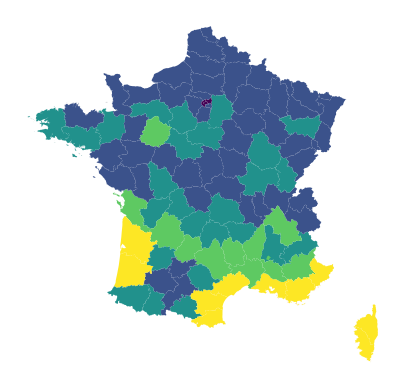

In [22]:
ax = dep.plot(column = "categorie")
ax.set_axis_off()

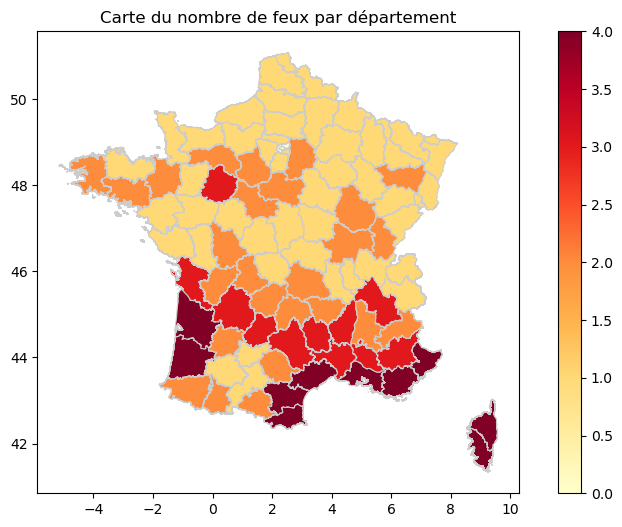

In [23]:
# Supposons que "dep" est votre GeoDataFrame et "nb_feu" est la colonne que vous voulez représenter
# Vous pouvez remplacer la colormap par celle de votre choix, par exemple "viridis", "plasma", "inferno", etc.
cmap = 'YlOrRd'

# Définir la plage de valeurs pour la colormap
vmin, vmax = dep['categorie'].min(), dep['categorie'].max()

# Créer la figure et les axes
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Utiliser la méthode plot avec l'argument cmap pour personnaliser le gradient de couleurs
ax = dep.plot(column="categorie", cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)



# Ajouter un titre à la carte
plt.title('Carte du nombre de feux par département')

# Afficher la carte
plt.show()


/tmp/ipykernel_300/854004673.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name)


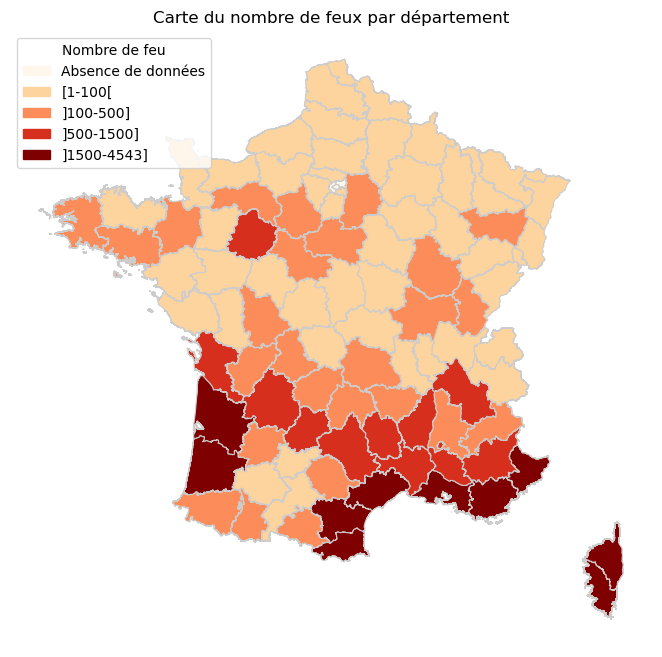

In [24]:
from matplotlib.colors import to_rgba
from matplotlib.patches import Patch

# Supposons que "dep" est votre GeoDataFrame et "nb_feu" est la colonne que vous voulez représenter
# Vous pouvez remplacer la colormap par celle de votre choix, par exemple "viridis", "plasma", "inferno", etc.
cmap_name = 'OrRd'

# Définir la plage de valeurs pour la colormap
vmin, vmax = dep['categorie'].min(), dep['categorie'].max()

# Créer la figure et les axes
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Utiliser la méthode plot avec l'argument cmap pour personnaliser le gradient de couleurs
plot = dep.plot(column="categorie", cmap=cmap_name, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, vmin=vmin, vmax=vmax)

# Récupérer les couleurs de la colormap
cmap = plt.cm.get_cmap(cmap_name)
colors = [to_rgba(cmap(i)) for i in range(cmap.N)]

# Personnaliser l'affichage de la légende
legend_labels = ['Absence de données', '[1-100[', ']100-500]', ']500-1500]', ']1500-4543]']  # Remplacez par les descriptions de votre choix
legend_patches = [Patch(color=colors[0], label=legend_labels[0]),
                  Patch(color=colors[64], label=legend_labels[1]), Patch(color=colors[128], label=legend_labels[2]), Patch(color=colors[192], label=legend_labels[3]), Patch(color=colors[255], label=legend_labels[4])]

ax.legend(handles=legend_patches, loc='upper left', title='Nombre de feu')

# Masquer les axes
ax.set_axis_off()

# Ajouter un titre à la carte
plt.title('Carte du nombre de feux par département')

# Afficher la carte
plt.show()


In [25]:
# Calculer le nombre d'occurrences par département
counts2 = df['Département'].value_counts().to_frame().reset_index()

# Calculer la somme des surfaces par département
surface_sum = df.groupby('Département')['Surface parcourue (m2)'].sum().reset_index()
surface_sum.columns = ['Département', 'surface']

# Fusionner les deux DataFrames sur la colonne 'Département'
result = pd.merge(counts, surface_sum, on='Département')


In [26]:
result.head()

,Département,count,surface
0,2B,4543,221122629
1,2A,4404,126433930
2,13,3527,141670553
3,33,3298,352567022
4,34,2799,145380586


In [27]:
def rat(count, surface):
    return surface/count if surface!=0 else 0

In [28]:
result['ratio']=result.apply(lambda row : rat(row['count'], row['surface']), axis=1)

In [29]:
result.head()

,Département,count,surface,ratio
0,2B,4543,221122629,48673.261941
1,2A,4404,126433930,28708.885104
2,13,3527,141670553,40167.437766
3,33,3298,352567022,106903.281383
4,34,2799,145380586,51940.187924


In [30]:
result.loc[len(result)] = ['93', 0, 0, 0]

In [31]:
result.loc[len(result)] = ['92', 0, 0, 0]

In [32]:
result.loc[len(result)] = ['75', 0, 0, 0]

In [33]:
result = result.set_index('Département')

In [34]:
dep['ratio']=0

In [35]:
for i in range(0, 96):
    num = dep.loc[i, 'INSEE_DEP']
    a = result.loc[num, 'ratio']
    dep.loc[i, 'ratio']=a

/tmp/ipykernel_300/204975787.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '38783.333333333336' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dep.loc[i, 'ratio']=a


In [36]:
def couleur_ratio(chiffre):
    if chiffre/10000 ==0:
        return 0
    elif chiffre/10000 <= 1:
        return 1
    elif chiffre/10000<= 4.6:
        return 2
    elif chiffre/10000 < 10:
        return 3
    else:
        return 4

In [37]:
dep['cat'] = dep['ratio'].apply(couleur_ratio)

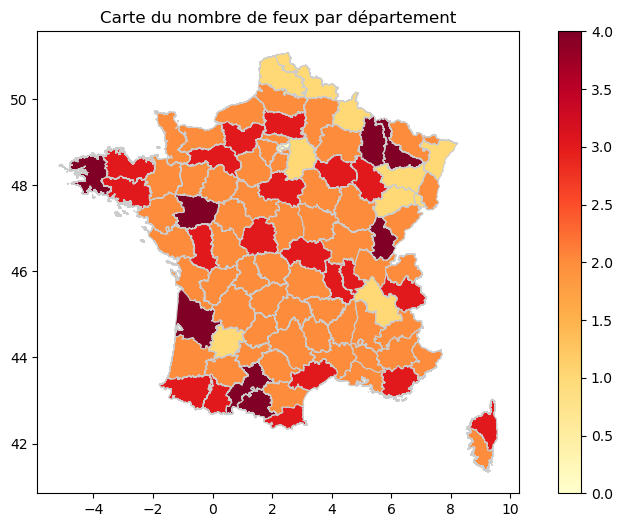

In [38]:
# Supposons que "dep" est votre GeoDataFrame et "nb_feu" est la colonne que vous voulez représenter
# Vous pouvez remplacer la colormap par celle de votre choix, par exemple "viridis", "plasma", "inferno", etc.
cmap = 'YlOrRd'

# Définir la plage de valeurs pour la colormap
vmin, vmax = dep['cat'].min(), dep['cat'].max()

# Créer la figure et les axes
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Utiliser la méthode plot avec l'argument cmap pour personnaliser le gradient de couleurs
ax = dep.plot(column="cat", cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)



# Ajouter un titre à la carte
plt.title('Carte du nombre de feux par département')

# Afficher la carte
plt.show()


# Feu hors norme

In [40]:
#on choisit uniquement les feu qui ont parcouru plus 
df_hors_norme = df[df['Surface parcourue (m2)'] > 1*10**7]

In [41]:
liste = df_hors_norme['Département'].unique().tolist()

In [42]:
liste.remove('974')

In [43]:
liste

['13', '2A', '34', '66', '33', '83', '2B', '84', '11', '29', '49', '07', '48']

In [44]:
shp_communes = s3.download_vectorfile_url_all(
    crs = 4326,
    values = liste,
    borders="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=13/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 866kiB [00:00, 16.3MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=2A/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.51MiB [00:00, 16.4MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=34/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.38MiB [00:00, 17.7MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=66/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 920kiB [00:00, 18.2MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=33/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.47MiB [00:00, 19.4MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=83/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.20MiB [00:00, 18.2MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=2B/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.25MiB [00:00, 24.9MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=84/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 598kiB [00:00, 48.9MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=11/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.29MiB [00:00, 15.6MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=29/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 2.67MiB [00:00, 18.2MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=49/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.02MiB [00:00, 37.9MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=07/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.62MiB [00:00, 14.7MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=48/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.02MiB [00:00, 19.2MiB/s]


In [45]:
shp_communes.tail()

,id,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,INSEE_COG,geometry
147,COMMUNE_0000000009756673,NaN,Les Salces,LES SALCES,48187,Commune simple,101,01,2,48,76,200069268,IGN:EXPRESS-COG-CARTO-TERRITOIRE,48187,"POLYGON ((3.07659 44.56982, 3.07656 44.57040, ..."
148,COMMUNE_0000000009756892,NaN,Saint-Bonnet-de-Chirac,SAINT-BONNET-DE-CHIRAC,48138,Commune simple,67,03,2,48,76,244800470,IGN:EXPRESS-COG-CARTO-TERRITOIRE,48138,"POLYGON ((3.28607 44.51931, 3.28619 44.51927, ..."
149,COMMUNE_0000000009756888,NaN,Lanuéjols,LANUEJOLS,48081,Commune simple,316,13,2,48,76,200069128,IGN:EXPRESS-COG-CARTO-TERRITOIRE,48081,"POLYGON ((3.61855 44.50412, 3.61949 44.50402, ..."
150,COMMUNE_0000000009756882,NaN,Prévenchères,PREVENCHERES,48119,Commune simple,250,13,2,48,76,200069128,IGN:EXPRESS-COG-CARTO-TERRITOIRE,48119,"POLYGON ((3.90301 44.48940, 3.90292 44.48939, ..."
151,COMMUNE_0000000009757090,NaN,Saint-Bauzile,SAINT-BAUZILE,48137,Commune simple,624,13,2,48,76,244800405,IGN:EXPRESS-COG-CARTO-TERRITOIRE,48137,"POLYGON ((3.50245 44.43734, 3.50240 44.43745, ..."


In [46]:
villes = df_hors_norme['Code INSEE'].unique().tolist()

In [47]:
len(villes)

30

In [48]:
shp_communes = shp_communes[shp_communes['INSEE_COM'].isin(villes)]

In [49]:
shp_communes.head()

,id,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,INSEE_COG,geometry
40,COMMUNE_0000000009760350,NaN,Rognac,ROGNAC,13081,Commune simple,12086,06,4,13,93,200054807,IGN:EXPRESS-COG-CARTO-TERRITOIRE,13081,"POLYGON ((5.26959 43.49555, 5.26961 43.49548, ..."
61,COMMUNE_0000000009758976,NaN,Graveson,GRAVESON,13045,Commune simple,4856,07,2,13,93,200035087,IGN:EXPRESS-COG-CARTO-TERRITOIRE,13045,"POLYGON ((4.73205 43.81983, 4.73207 43.81986, ..."
118,ARR_MUNI0000000009761157,NaN,Marseille 7e Arrondissement,MARSEILLE 7E ARRONDISSEMENT,13055,Préfecture de région,34697,98,3,13,93,200054807,IGN:EXPRESS-COG-CARTO-TERRITOIRE,13207,"MULTIPOLYGON (((5.28590 43.26391, 5.28587 43.2..."
119,ARR_MUNI0000000009761407,NaN,Marseille 9e Arrondissement,MARSEILLE 9E ARRONDISSEMENT,13055,Préfecture de région,76633,98,3,13,93,200054807,IGN:EXPRESS-COG-CARTO-TERRITOIRE,13209,"MULTIPOLYGON (((5.45513 43.21163, 5.45510 43.2..."
120,ARR_MUNI0000000009761163,NaN,Marseille 1er Arrondissement,MARSEILLE 1ER ARRONDISSEMENT,13055,Préfecture de région,39893,98,3,13,93,200054807,IGN:EXPRESS-COG-CARTO-TERRITOIRE,13201,"POLYGON ((5.37214 43.29097, 5.37181 43.29169, ..."


In [50]:
# Spécifiez le chemin du fichier GeoJSON des départements
file_path = 'https://static.data.gouv.fr/resources/carte-des-departements-2-1/20191202-212236/contour-des-departements.geojson'

# Chargez les données géographiques avec GeoPandas
france_departments = gpd.read_file(file_path)


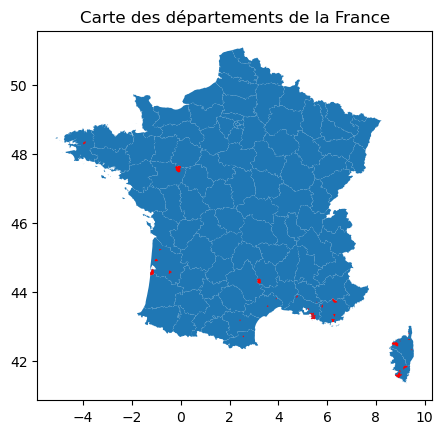

In [51]:
france_departments.plot()
plt.title('Carte des départements de la France')
shp_communes.plot(marker='o', color='red', markersize=5, ax=plt.gca())
plt.show()

In [52]:
shp_communes['taille incendie']=0

In [53]:
shp_communes = shp_communes.reset_index()

In [54]:
df_hors_norme = df_hors_norme.sort_values(by='Surface parcourue (m2)', ascending=False)
df_hors_norme = df_hors_norme.drop_duplicates(subset='Code INSEE', keep='first')

In [55]:
df_hors_norme = df_hors_norme.set_index('Code INSEE')

In [56]:
len(shp_communes['INSEE_COM'])

42

In [57]:
df_hors_norme.loc['33225', 'Surface parcourue (m2)']

125520000

In [58]:
for i in range(0, 42):
    com = shp_communes.loc[i, 'INSEE_COM']
    print(com)
    taille = df_hors_norme.loc[com, 'Surface parcourue (m2)']
    print("la taille de l'incendie etait de", taille)
    shp_communes.loc[i, 'taille incendie']=taille

13081
la taille de l'incendie etait de 26630000
13045
la taille de l'incendie etait de 14515300
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
13055
la taille de l'incendie etait de 10650000
2A272
la taille de l'incendie etait de 12010000
2A254
la taille de l'incendie etait de 31392900
2A118
la taille de l'incendie etait de 3

In [59]:
shp_communes.head()

,index,id,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,INSEE_COG,geometry,taille incendie
0,40,COMMUNE_0000000009760350,NaN,Rognac,ROGNAC,13081,Commune simple,12086,06,4,13,93,200054807,IGN:EXPRESS-COG-CARTO-TERRITOIRE,13081,"POLYGON ((5.26959 43.49555, 5.26961 43.49548, ...",26630000
1,61,COMMUNE_0000000009758976,NaN,Graveson,GRAVESON,13045,Commune simple,4856,07,2,13,93,200035087,IGN:EXPRESS-COG-CARTO-TERRITOIRE,13045,"POLYGON ((4.73205 43.81983, 4.73207 43.81986, ...",14515300
2,118,ARR_MUNI0000000009761157,NaN,Marseille 7e Arrondissement,MARSEILLE 7E ARRONDISSEMENT,13055,Préfecture de région,34697,98,3,13,93,200054807,IGN:EXPRESS-COG-CARTO-TERRITOIRE,13207,"MULTIPOLYGON (((5.28590 43.26391, 5.28587 43.2...",10650000
3,119,ARR_MUNI0000000009761407,NaN,Marseille 9e Arrondissement,MARSEILLE 9E ARRONDISSEMENT,13055,Préfecture de région,76633,98,3,13,93,200054807,IGN:EXPRESS-COG-CARTO-TERRITOIRE,13209,"MULTIPOLYGON (((5.45513 43.21163, 5.45510 43.2...",10650000
4,120,ARR_MUNI0000000009761163,NaN,Marseille 1er Arrondissement,MARSEILLE 1ER ARRONDISSEMENT,13055,Préfecture de région,39893,98,3,13,93,200054807,IGN:EXPRESS-COG-CARTO-TERRITOIRE,13201,"POLYGON ((5.37214 43.29097, 5.37181 43.29169, ...",10650000


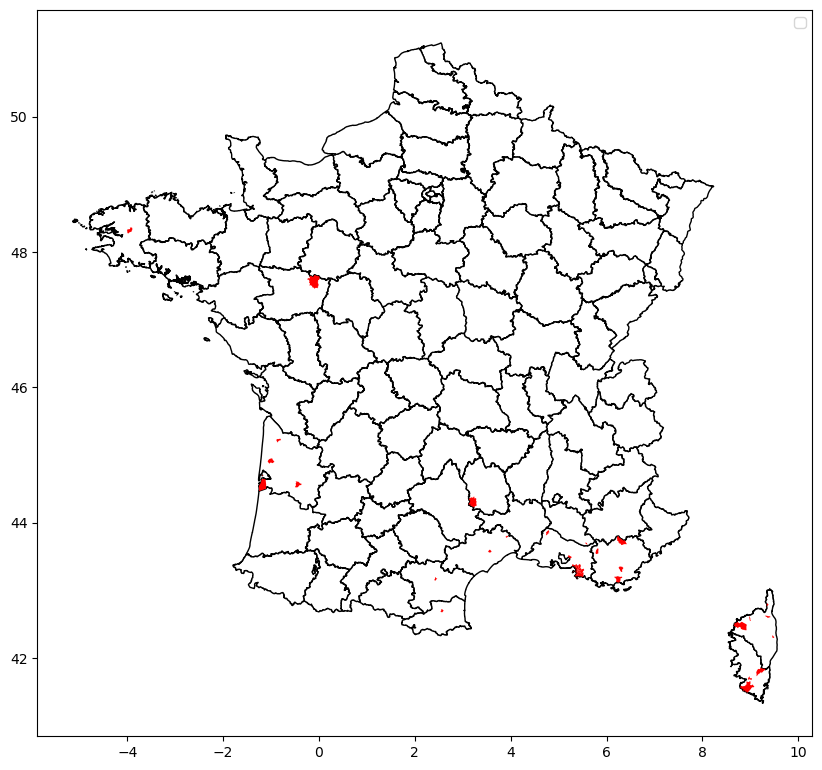

In [60]:
# Plot du fond de carte
ax = france_departments.plot(figsize=(10, 10), edgecolor='black', color='white')

# Plot des marqueurs de taille proportionnelle
shp_communes.plot(ax=ax, marker='o', color='red', markersize=shp_communes['taille incendie']*10)

# Ajoutez une légende si nécessaire
ax.legend(["Fond de carte", "Marqueurs d'incendie"])

# Affichez la carte 
plt.show()


# Différence des feux entre 2006-2021 et 2022

*Moyenne en 2022*

In [117]:
# Filtrer le DataFrame pour ne conserver que les lignes où l'année est 2022
df_2022 = df[df['Année'] == 2022]

# Calculer la somme de la surface parcourue par département en 2022
surface_par_departement_2022 = df_2022.groupby('Département')['Surface parcourue (m2)'].sum().reset_index()

# Renommer les colonnes
surface_par_departement_2022.columns = ['Département', 'Surface_moyenne_2022']

# Convertir la surface de mètres carrés en hectares
surface_par_departement_2022['Surface_hectares_2022'] = surface_par_departement_2022['Surface_moyenne_2022'] / 10000

surface_par_departement_2022.head()  #df avec la moyenne de surface brûlée en 2022 pour chaque département

,Département,Surface_moyenne_2022,Surface_hectares_2022
0,01,145000,14.5000
1,02,110000,11.0000
2,03,20,0.0020
3,04,13358135,1335.8135
4,05,995435,99.5435


In [118]:
surface_par_departement_2022.loc[len(surface_par_departement_2022)] = ['25', 0,0]

In [119]:
surface_par_departement_2022.loc[len(surface_par_departement_2022)] = ['51', 0,0]

In [120]:
surface_par_departement_2022.loc[len(surface_par_departement_2022)] = ['75', 0,0]

In [121]:
surface_par_departement_2022.loc[len(surface_par_departement_2022)] = ['92', 0,0]

In [122]:
surface_par_departement_2022.loc[len(surface_par_departement_2022)] = ['93', 0,0]

In [123]:
surface_par_departement_2022.loc[len(surface_par_departement_2022)] = ['94', 0,0]

In [124]:
dep['Surface_2022'] = 0

In [125]:
surface_par_departement_2022= surface_par_departement_2022.set_index('Département')

In [126]:
for i in range(0,96):
    num = dep.loc[i,'INSEE_DEP']
    a = surface_par_departement_2022.loc[num,'Surface_hectares_2022']
    dep.loc[i,'Surface_2022'] = a

/tmp/ipykernel_300/2537370069.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '14.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dep.loc[i,'Surface_2022'] = a


In [127]:
def couleur_surface(chiffre):
    if chiffre==0:
        return 0
    elif chiffre < 10:
        return 1
    elif chiffre < 100:
        return 2
    elif chiffre < 1000:
        return 3
    elif chiffre < 10000:
        return 4
    else:
        return 5

/tmp/ipykernel_300/3191653313.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name)


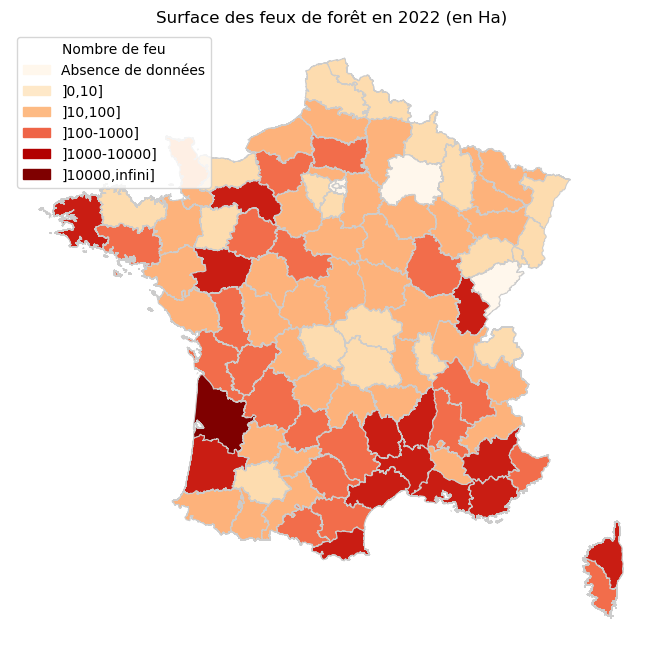

In [128]:
dep['categorie_2022']=dep['Surface_2022'].apply(couleur_surface)

from matplotlib.colors import to_rgba
from matplotlib.patches import Patch

# Supposons que "dep" est votre GeoDataFrame et "nb_feu" est la colonne que vous voulez représenter
# Vous pouvez remplacer la colormap par celle de votre choix, par exemple "viridis", "plasma", "inferno", etc.
cmap_name = 'OrRd'

# Définir la plage de valeurs pour la colormap
vmin, vmax = dep['categorie_2022'].min(), dep['categorie_2022'].max()

# Créer la figure et les axes
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Utiliser la méthode plot avec l'argument cmap pour personnaliser le gradient de couleurs
plot = dep.plot(column="categorie_2022", cmap=cmap_name, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, vmin=vmin, vmax=vmax)

# Récupérer les couleurs de la colormap
cmap = plt.cm.get_cmap(cmap_name)
colors = [to_rgba(cmap(i)) for i in range(cmap.N)]

# Personnaliser l'affichage de la légende
legend_labels = ['Absence de données', ']0,10]', ']10,100]', ']100-1000]', ']1000-10000]',']10000,infini]']  # Remplacez par les descriptions de votre choix
legend_patches = [Patch(color=colors[0], label=legend_labels[0]),
                  Patch(color=colors[32], label=legend_labels[1]), Patch(color=colors[96], label=legend_labels[2]), Patch(color=colors[160], label=legend_labels[3]), Patch(color=colors[224], label=legend_labels[4]),Patch(color=colors[255], label=legend_labels[5])]

ax.legend(handles=legend_patches, loc='upper left', title='Nombre de feu')

# Masquer les axes
ax.set_axis_off()

# Ajouter un titre à la carte
plt.title('Surface des feux de forêt en 2022 (en Ha)')

# Afficher la carte
plt.show()

*Moyenne de 2006 à 2021*

In [244]:
df['Année'] = pd.to_numeric(df['Année'], errors='coerce')

# Moyenne annuelle de la surface parcourue par département par année 
df_surface_moyenne_par_an = df[df['Année'] <= 2021].groupby(['Département', 'Année'])['Surface parcourue (m2)'].mean().reset_index()

# Renommer les colonnes
df_surface_moyenne_par_an.columns = ['Département', 'Année', 'Moyenne_Surface']

df_surface_moyenne_par_an['Surface_hectares_moyenne'] = df_surface_moyenne_par_an['Moyenne_Surface'] / 10000

# Afficher le nouveau DataFrame avec la moyenne annuelle
print(df_surface_moyenne_par_an.head())


  Département  Année  Moyenne_Surface  Surface_hectares_moyenne
0          01   2006     22500.000000                  2.250000
1          01   2007     13750.000000                  1.375000
2          01   2008     20538.461538                  2.053846
3          01   2012     65000.000000                  6.500000
4          01   2015     65000.000000                  6.500000


In [245]:
# Calculer la moyenne par département des surfaces brûlées de 2006 à 2021 (moyenne des moyennes)
df_moyenne_totale = df_surface_moyenne_par_an.groupby('Département')['Surface_hectares_moyenne'].mean().reset_index()

# Renommer les colonnes
df_moyenne_totale.columns = ['Département', 'Moyenne_Surface']

# Afficher le nouveau DataFrame avec la moyenne par département
print(df_moyenne_totale)

   Département  Moyenne_Surface
0           01         5.711218
1           02         2.463951
2           03         6.689107
3           04         3.080217
4           05         2.958598
..         ...              ...
88          91        16.962500
89          94         2.000000
90          95         0.064722
91         974        34.964714
92         976         1.723733

[93 rows x 2 columns]


In [246]:
df_moyenne_totale.loc[len(df_moyenne_totale)] = ['20',0]

In [247]:
df_moyenne_totale.loc[len(df_moyenne_totale)] = ['44',0]

In [248]:
df_moyenne_totale.loc[len(df_moyenne_totale)] = ['59',0]

In [249]:
df_moyenne_totale.loc[len(df_moyenne_totale)] = ['75',0]

In [250]:
df_moyenne_totale.loc[len(df_moyenne_totale)] = ['92',0]

In [251]:
df_moyenne_totale.loc[len(df_moyenne_totale)] = ['93',0]

In [252]:
df_moyenne_totale= df_moyenne_totale.set_index('Département')

In [253]:
dep['Surface_moyenne_anuelle'] = 0

for i in range(0,96):
    num = dep.loc[i,'INSEE_DEP']
    #print(num)
    a = df_moyenne_totale.loc[num,'Moyenne_Surface']
    #print("la surface de l'incendie était de", a)
    dep.loc[i,'Surface_moyenne_anuelle'] = a

/tmp/ipykernel_300/3153304344.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.711217948717949' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dep.loc[i,'Surface_moyenne_anuelle'] = a


In [256]:
def couleur_surface_moyenne(chiffre):
    if chiffre==0:
        return 0
    elif chiffre < 10:
        return 1
    elif chiffre < 100:
        return 2
    elif chiffre < 1000:
        return 3
    elif chiffre < 1280:
        return 4

/tmp/ipykernel_300/2182651230.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name)


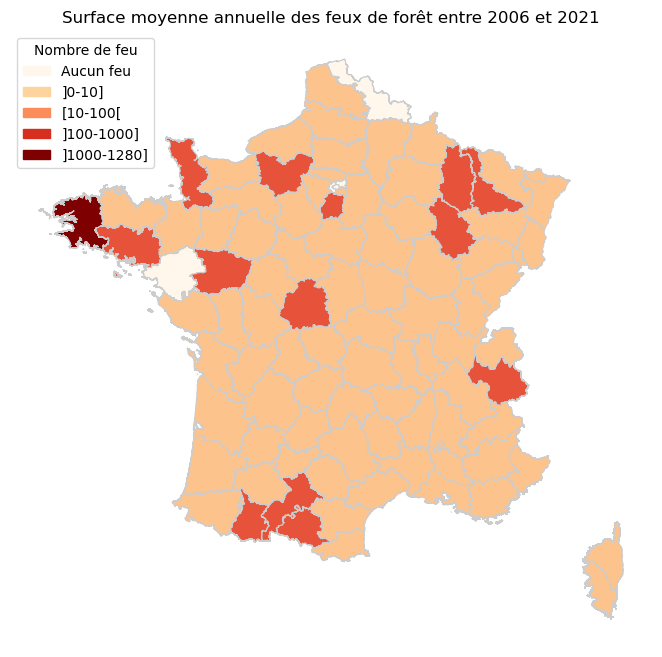

In [257]:
dep['categorie_moyenne']=dep['Surface_moyenne_anuelle'].apply(couleur_surface_moyenne)

from matplotlib.colors import to_rgba
from matplotlib.patches import Patch
# Supposons que "dep" est votre GeoDataFrame et "nb_feu" est la colonne que vous voulez représenter
# Vous pouvez remplacer la colormap par celle de votre choix, par exemple "viridis", "plasma", "inferno", etc.
cmap_name = 'OrRd'

# Définir la plage de valeurs pour la colormap
vmin, vmax = dep['categorie_moyenne'].min(), dep['categorie_moyenne'].max()

# Créer la figure et les axes
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Utiliser la méthode plot avec l'argument cmap pour personnaliser le gradient de couleurs
plot = dep.plot(column="categorie_moyenne", cmap=cmap_name, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, vmin=vmin, vmax=vmax)

# Récupérer les couleurs de la colormap
cmap = plt.cm.get_cmap(cmap_name)
colors = [to_rgba(cmap(i)) for i in range(cmap.N)]

# Personnaliser l'affichage de la légende
legend_labels = ['Aucun feu',']0-10]', '[10-100[', ']100-1000]', ']1000-1280]']  # Remplacez par les descriptions de votre choix
legend_patches = [Patch(color=colors[0], label=legend_labels[0]),
                  Patch(color=colors[64], label=legend_labels[1]), Patch(color=colors[128], label=legend_labels[2]), Patch(color=colors[192], label=legend_labels[3]), Patch(color=colors[255], label=legend_labels[4])]

ax.legend(handles=legend_patches, loc='upper left', title='Nombre de feu')

# Masquer les axes
ax.set_axis_off()

# Ajouter un titre à la carte
plt.title('Surface moyenne annuelle des feux de forêt entre 2006 et 2021 (en hA)')

# Afficher la carte
plt.show()